In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("DS_Temperature.csv")
data.head()

,Date,Max_temp,Min_temp,Avg_temp
0,1/1/2019,27.5,10.6,19.0
1,1/2/2019,27.8,11.0,19.1
2,1/3/2019,27.0,10.0,18.3
3,1/4/2019,24.8,8.8,16.8
4,1/5/2019,26.4,8.5,17.4


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2161 non-null   object 
 1   Max_temp  2161 non-null   float64
 2   Min_temp  2161 non-null   float64
 3   Avg_temp  2161 non-null   float64
dtypes: float64(3), object(1)
memory usage: 67.7+ KB


In [14]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2161 non-null   datetime64[ns]
 1   Max_temp  2161 non-null   float64       
 2   Min_temp  2161 non-null   float64       
 3   Avg_temp  2161 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 67.7 KB


In [15]:
data.isna().sum()

Date        0
Max_temp    0
Min_temp    0
Avg_temp    0
dtype: int64

In [16]:
data=data.dropna()
data.isna().sum()

Date        0
Max_temp    0
Min_temp    0
Avg_temp    0
dtype: int64

In [17]:
data.head()

,Date,Max_temp,Min_temp,Avg_temp
0,2019-01-01,27.5,10.6,19.0
1,2019-01-02,27.8,11.0,19.1
2,2019-01-03,27.0,10.0,18.3
3,2019-01-04,24.8,8.8,16.8
4,2019-01-05,26.4,8.5,17.4


In [18]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

In [19]:
data.head()

,Date,Max_temp,Min_temp,Avg_temp,Year,Month
0,2019-01-01,27.5,10.6,19.0,2019,1
1,2019-01-02,27.8,11.0,19.1,2019,1
2,2019-01-03,27.0,10.0,18.3,2019,1
3,2019-01-04,24.8,8.8,16.8,2019,1
4,2019-01-05,26.4,8.5,17.4,2019,1


In [20]:
def plot_vars(data,x,y,year):
    fig,ax=plt.subplots(figsize=(20,10))
                        
    sns.lineplot(
        ax=ax,
        data=data,
        x=x,
        y=y,
        hue=year,
        palette='bright'
    )
                        
    plt.show()

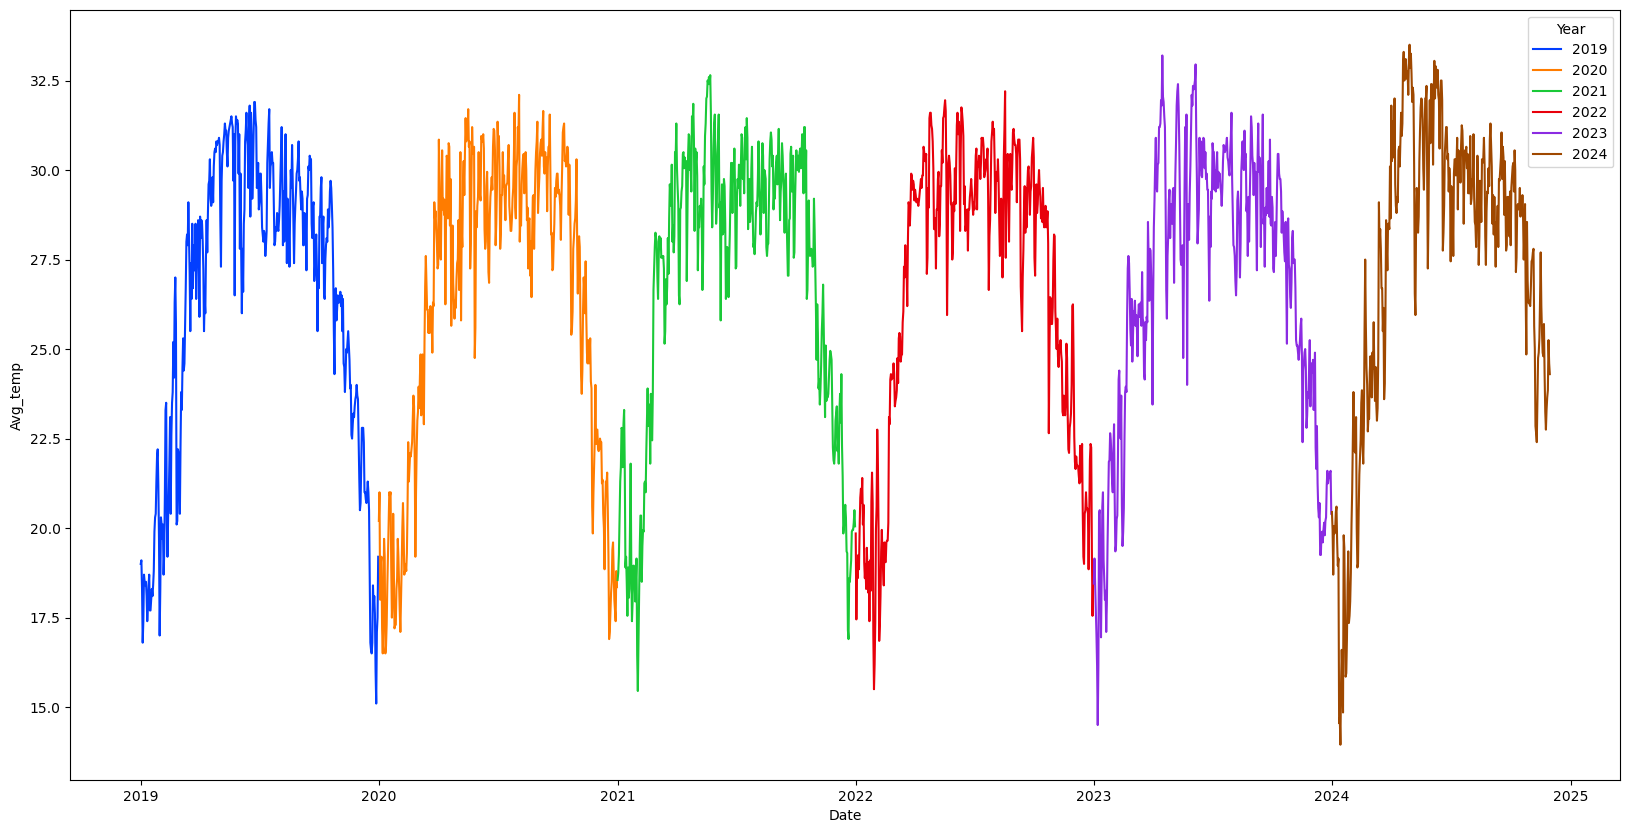

In [21]:
plot_vars(data,'Date','Avg_temp','Year')

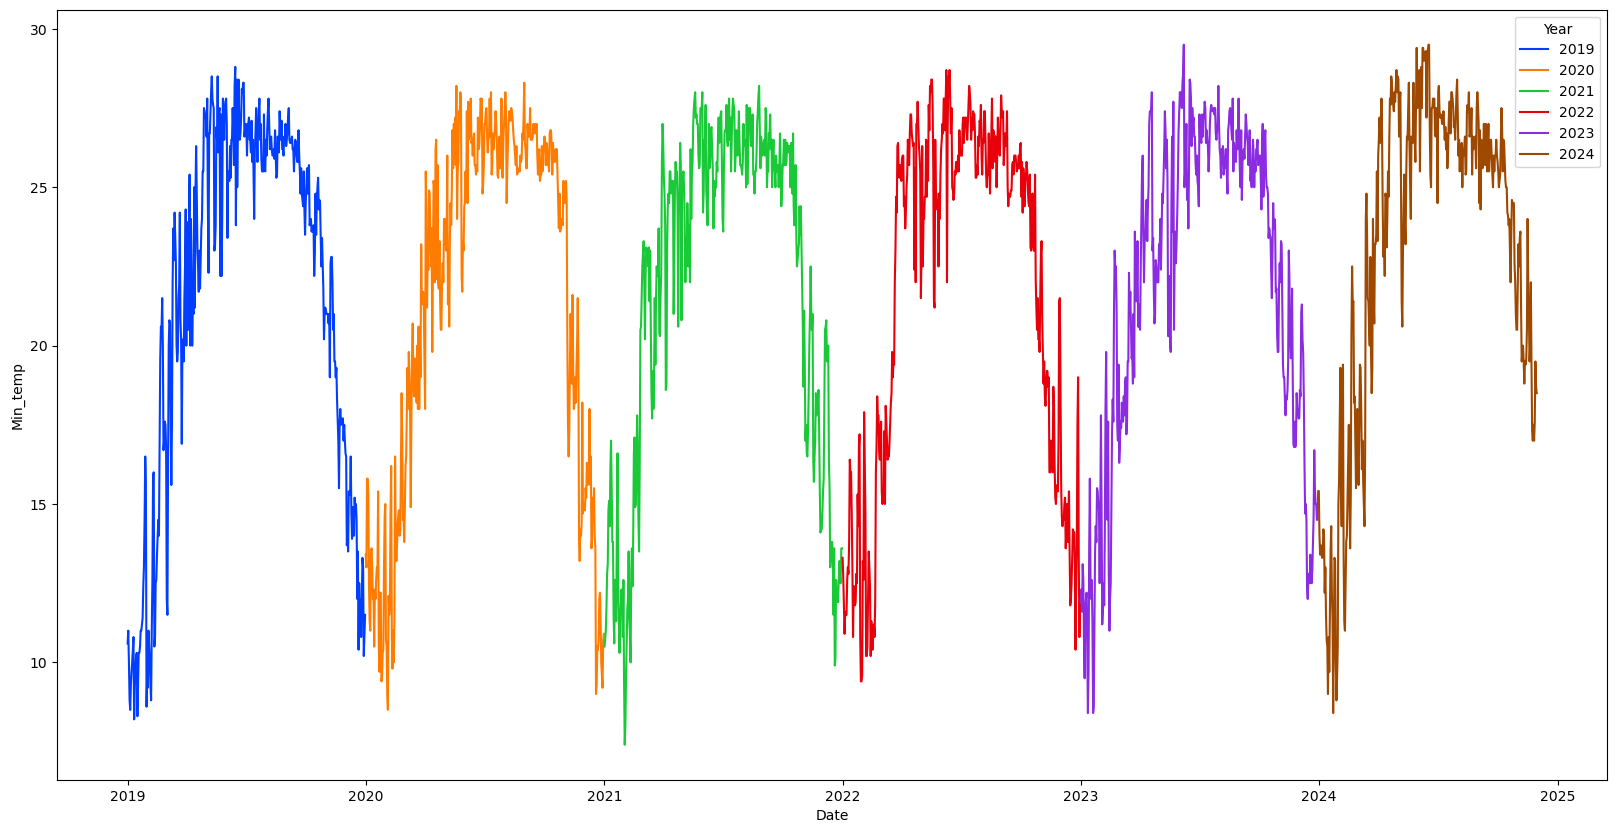

In [22]:
plot_vars(data,'Date','Min_temp','Year')

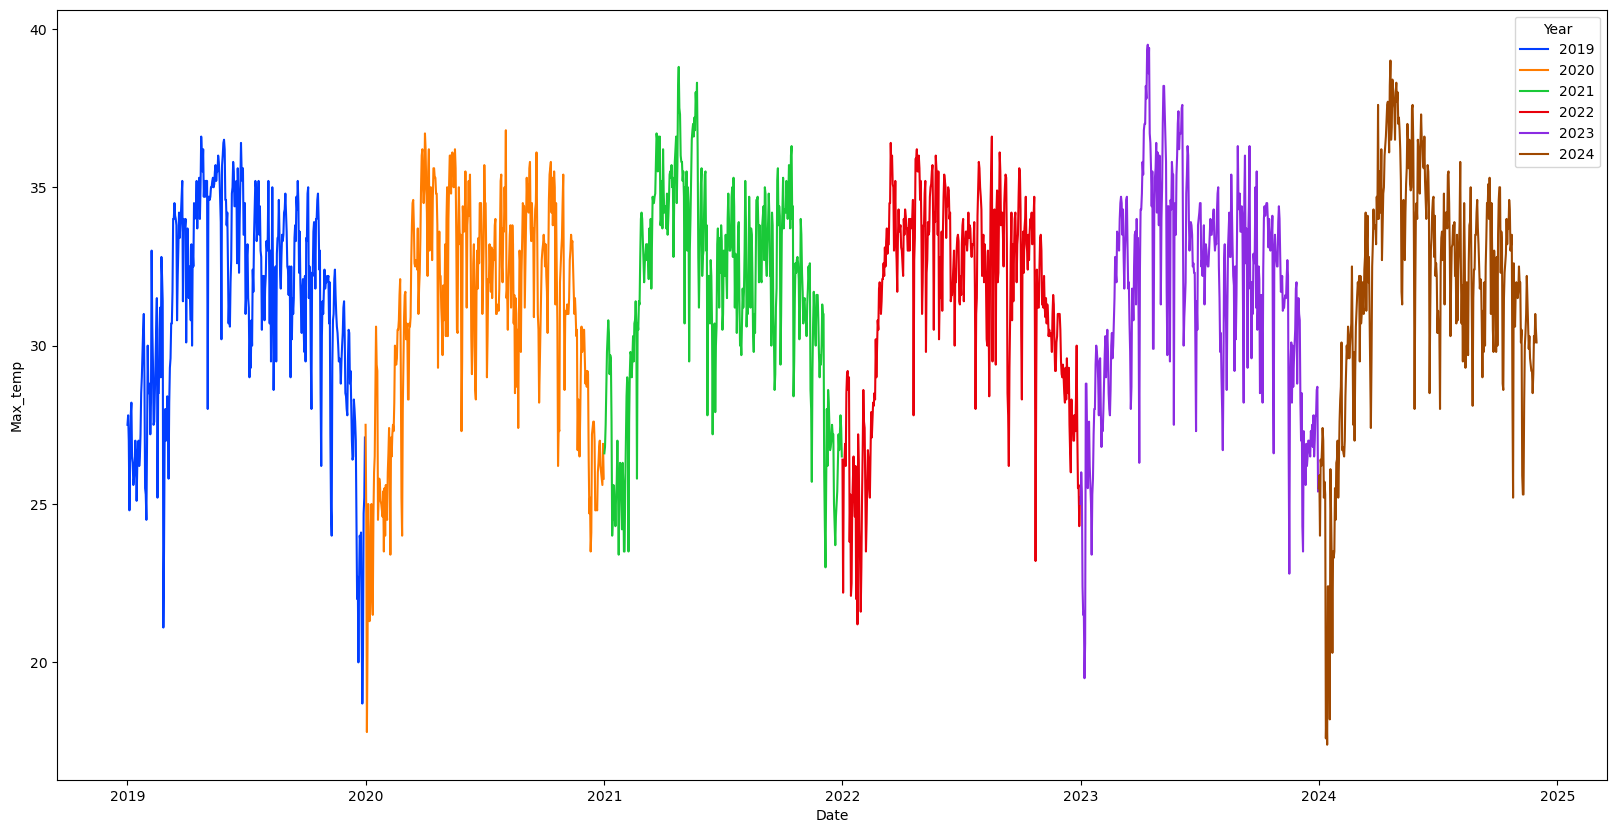

In [23]:
plot_vars(data,'Date','Max_temp','Year')

# Evaluating the Temperature Change over years(each month)

In [24]:
def plot_change(data,x,y,year):
    fig,ax=plt.subplots(figsize=(20,10))
    
    sns.lineplot(
        ax=ax,
        data=data,
        x=x,
        y=y,
        hue=year,
        palette='bright'
    )
    plt.show()

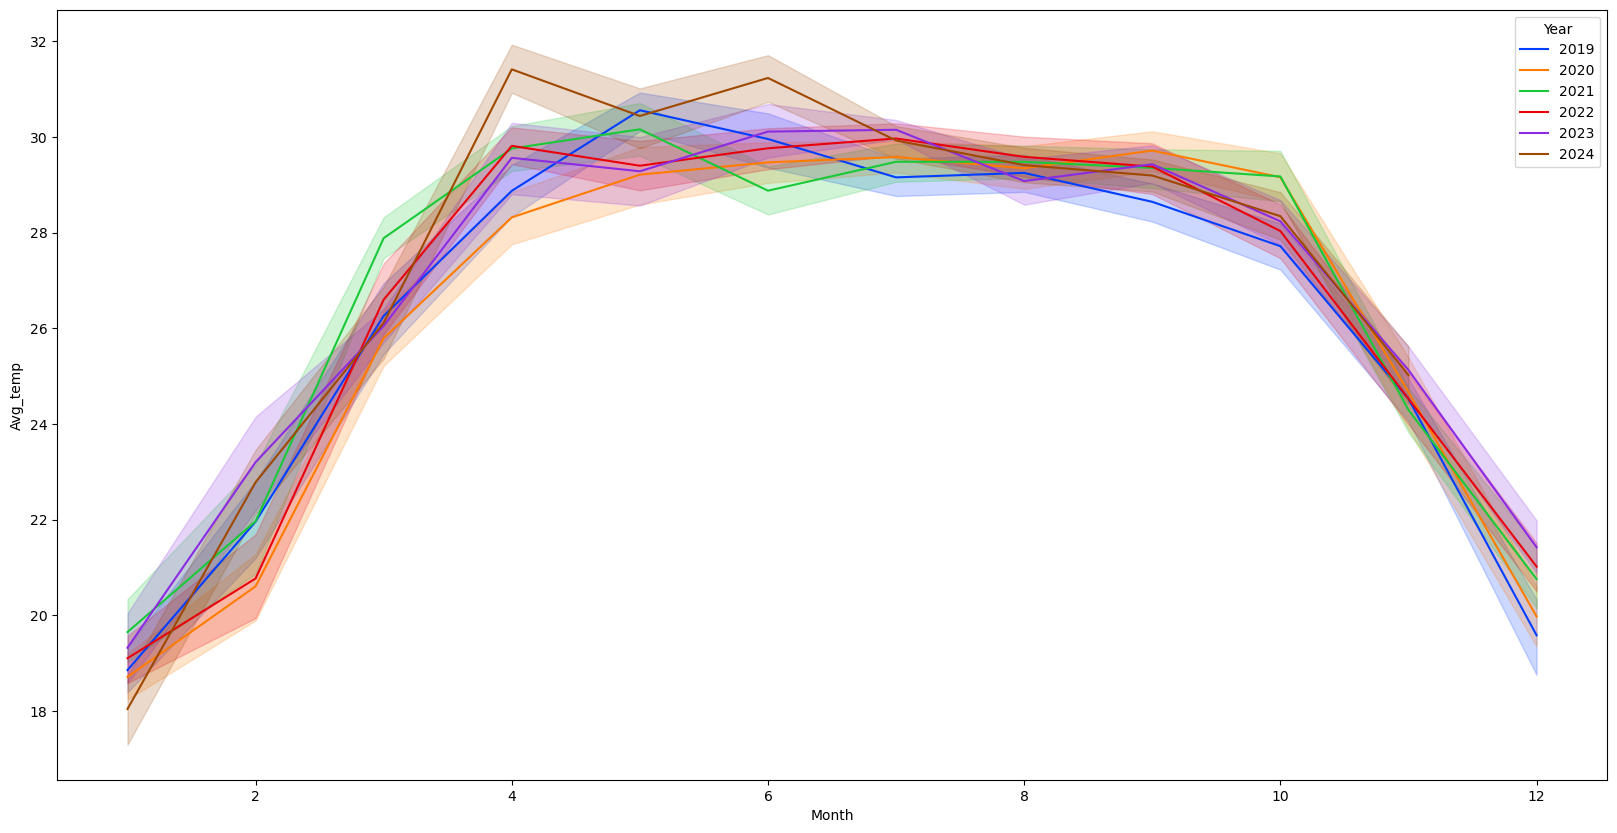

In [25]:
plot_change(data,'Month','Avg_temp','Year')

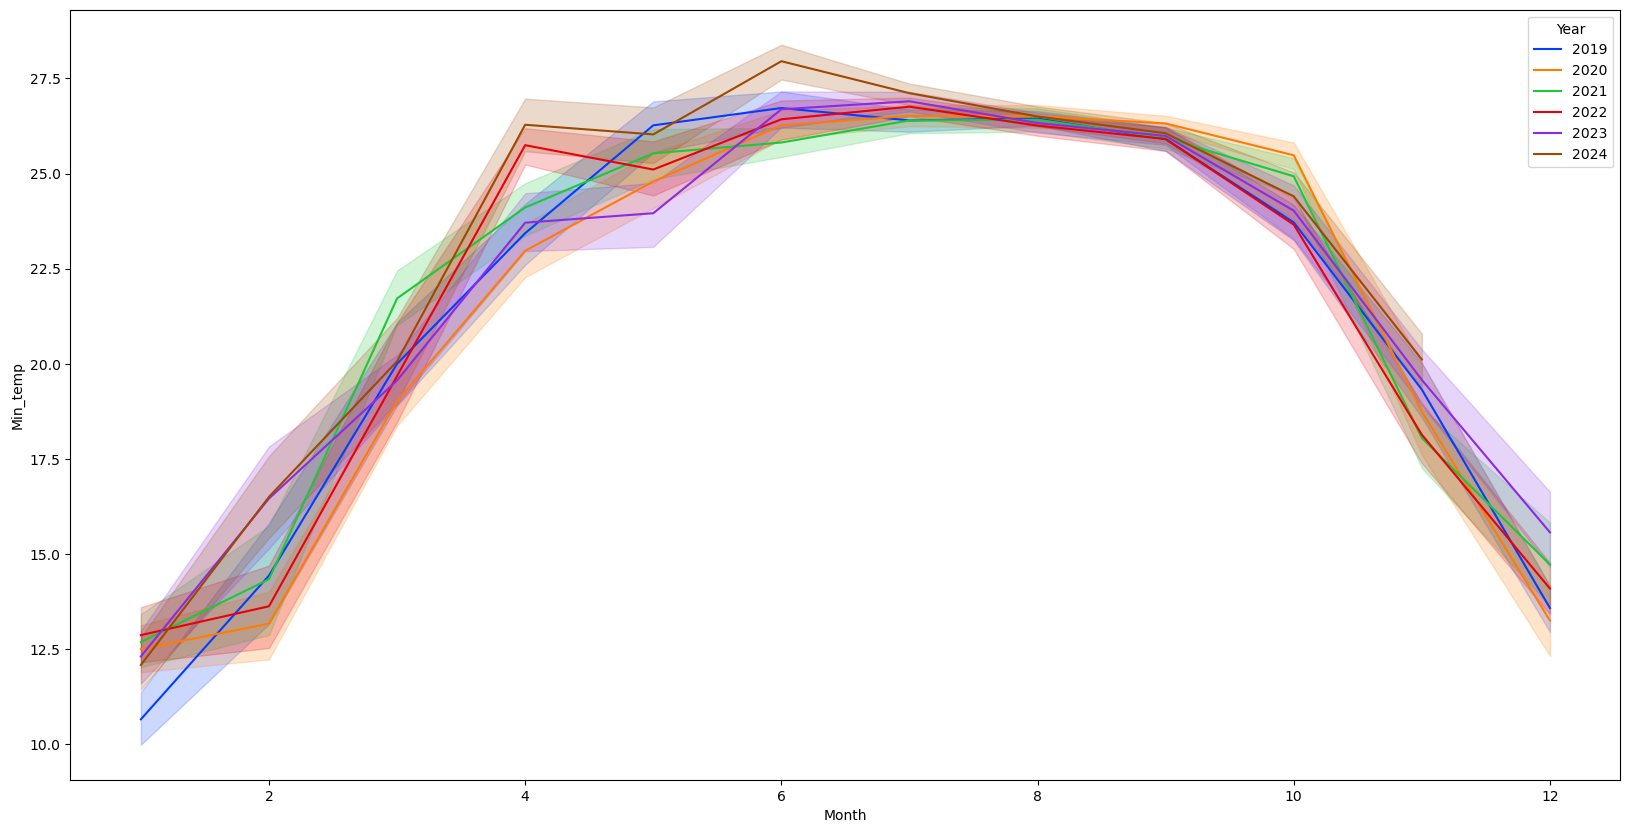

In [26]:
plot_change(data,'Month','Min_temp','Year')

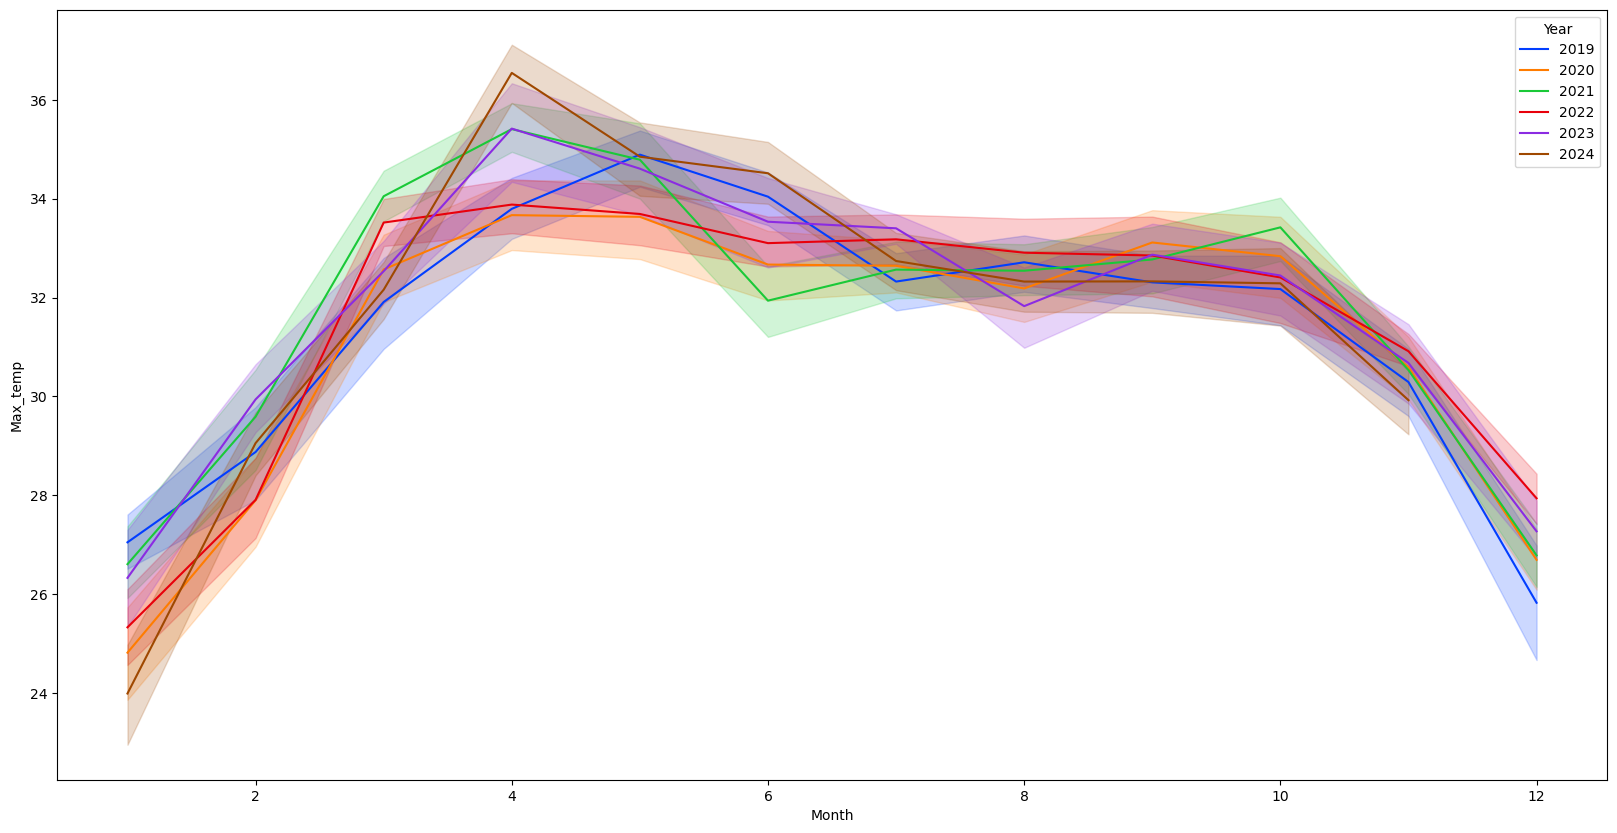

In [27]:
plot_change(data,'Month','Max_temp','Year')

In [28]:
data.corr()

,Date,Max_temp,Min_temp,Avg_temp,Year,Month
Date,1.000000,0.068549,0.118489,0.111232,0.985949,0.131982
Max_temp,0.068549,1.000000,0.730024,0.893222,0.059188,0.061436
Min_temp,0.118489,0.730024,1.000000,0.954384,0.077234,0.254273
Avg_temp,0.111232,0.893222,0.954384,1.000000,0.081376,0.186272
Year,0.985949,0.059188,0.077234,0.081376,1.000000,-0.034857
Month,0.131982,0.061436,0.254273,0.186272,-0.034857,1.000000


In [29]:
ndata=data

In [30]:
ndata.head()

,Date,Max_temp,Min_temp,Avg_temp,Year,Month
0,2019-01-01,27.5,10.6,19.0,2019,1
1,2019-01-02,27.8,11.0,19.1,2019,1
2,2019-01-03,27.0,10.0,18.3,2019,1
3,2019-01-04,24.8,8.8,16.8,2019,1
4,2019-01-05,26.4,8.5,17.4,2019,1


# ARIMA Model

In [31]:
ndata=ndata.drop(columns=['Max_temp','Min_temp','Year','Month'])

In [32]:
ndata=ndata.set_index('Date')

In [33]:
ndata.head()

,Avg_temp
Date,
2019-01-01,19.0
2019-01-02,19.1
2019-01-03,18.3
2019-01-04,16.8
2019-01-05,17.4


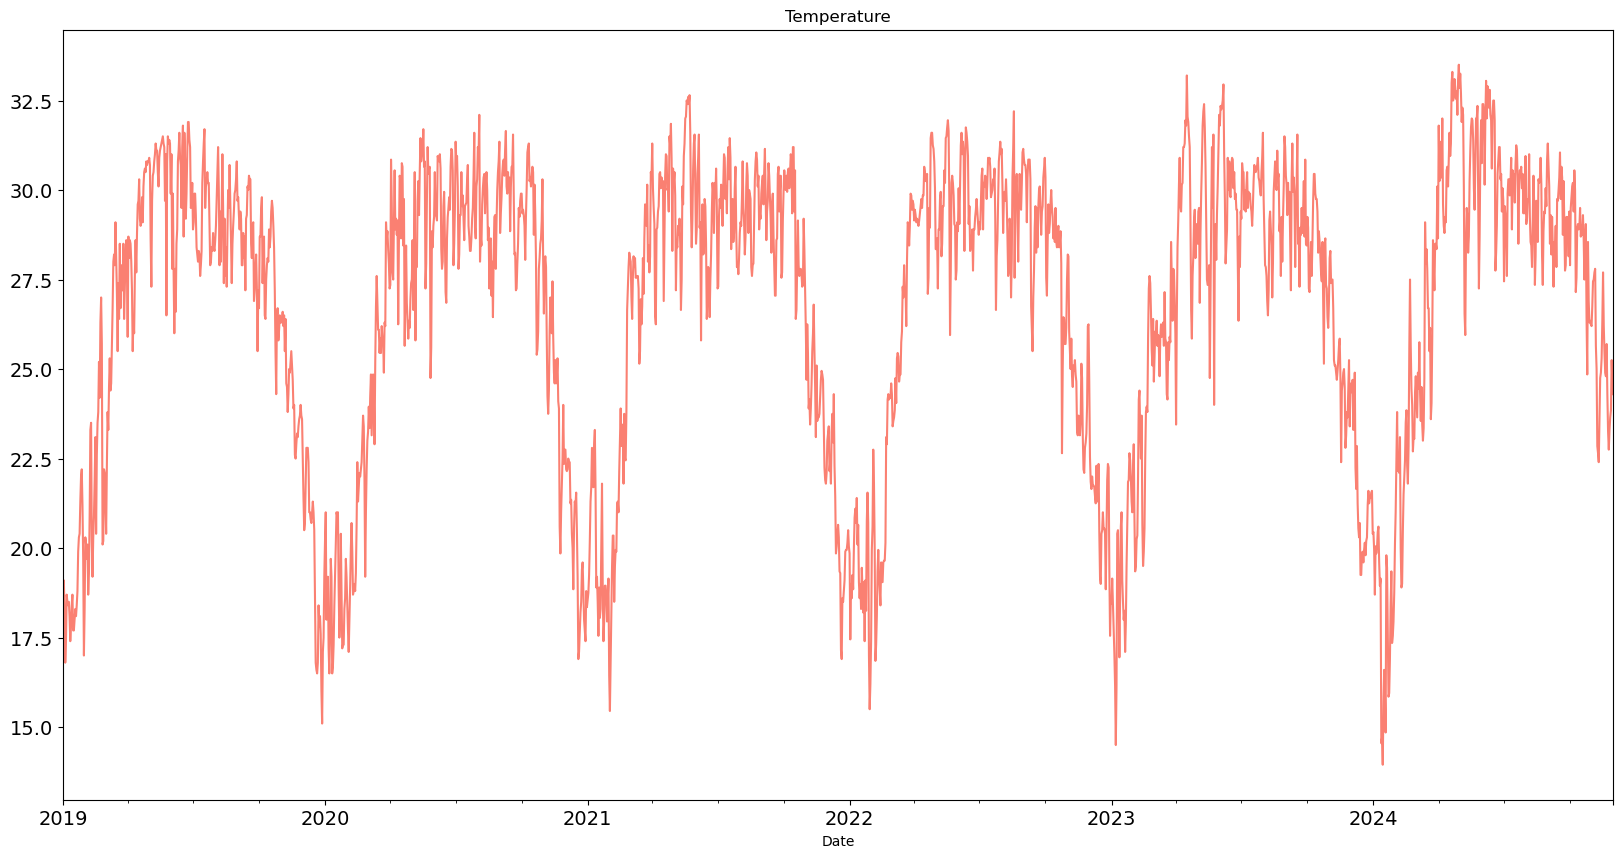

In [34]:
plt.figure(figsize=(20,10))
ndata.Avg_temp.plot(title='Temperature',fontsize=14,color='salmon')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ndata):
     ndatatest = adfuller(ndata, autolag = 'AIC')
     print("1. ADF : ",ndatatest[0])
     print("2. P-Value : ", ndatatest[1])
     print("3. Num Of Lags : ", ndatatest[2])
     print("4. Num Of Observations Used For ADF Regression:",ndatatest[3])
     print("5. Critical Values :")
     for key, val in ndatatest[4].items():
         print("\t",key, ": ", val)
adf_test(ndata['Avg_temp'])

1. ADF :  -3.273513802075399
2. P-Value :  0.01610472543016404
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 2149
5. Critical Values :
	 1% :  -3.433396592961799
	 5% :  -2.8628858719817356
	 10% :  -2.5674864760910148


In [39]:
!pip install pmdarima
from pmdarima import auto_arima
arimadata = auto_arima(ndata['Avg_temp'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6622.885, Time=3.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12328.551, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6743.424, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10139.640, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20376.695, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6686.187, Time=0.86 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6690.719, Time=2.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=6627.261, Time=2.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=6617.316, Time=2.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=6628.337, Time=1.26 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=6618.387, Time=3.12 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=6618.689, Time=3.03 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=6617.312, Time=1.69 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=7898.676, Time=1.04 sec
 ARIMA(1,0,5)(0,0,0)[0] interc

In [40]:
import statsmodels.api as sm

In [38]:
train=ndata.iloc[:-30]
test=ndata.iloc[-30:]
print(train.shape,test.shape)
print(ndata.shape)

(2131, 1) (30, 1)
(2161, 1)


In [41]:
model=sm.tsa.arima.ARIMA(train['Avg_temp'],order=(1,0,5))
model=model.fit()
model.summary()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Avg_temp   No. Observations:                 2131
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3259.652
Date:                Tue, 18 Feb 2025   AIC                           6535.304
Time:                        13:22:07   BIC                           6580.618
Sample:                    01-01-2019   HQIC                          6551.889
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1877      1.369     19.130      0.000      23.505      28.871
ar.L1          0.9928      0.003    361.687      0.000       0.987       0.998
ma.L1         -0.1519      0.018     -8.298      0.000      -0.188      -0.116
ma.L2         -0.1656      0.020     -8.233      0.000      -0.205      -0.126
ma.L3         -0.1521      0.022     -6.867      0.000      -0.196      -0.109
ma.L4         -0.0711      0.023     -3.069      0.002      -0.116      -0.026
ma.L5         -0.0123      0.022     -0.571      0.568      -0.054       0.030
sigma2         1.2461      0.029     42.706      0.000       1.189       1.303
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               592.94
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.61
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=ndata.index[start:end+1]
print(pred)
pred.dtypes

Date
2024-11-01    26.394761
2024-11-02    26.511892
2024-11-03    26.583228
2024-11-04    26.607580
2024-11-05    26.608555
2024-11-06    26.605508
2024-11-07    26.602483
2024-11-08    26.599480
2024-11-09    26.596499
2024-11-10    26.593540
2024-11-11    26.590602
2024-11-12    26.587685
2024-11-13    26.584789
2024-11-14    26.581915
2024-11-15    26.579061
2024-11-16    26.576227
2024-11-17    26.573415
2024-11-18    26.570622
2024-11-19    26.567850
2024-11-20    26.565098
2024-11-21    26.562366
2024-11-22    26.559653
2024-11-23    26.556961
2024-11-24    26.554287
2024-11-25    26.551634
2024-11-26    26.548999
2024-11-27    26.546383
2024-11-28    26.543786
2024-11-29    26.541209
2024-11-30    26.538649
Name: ARIMA Predictions, dtype: float64


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


dtype('float64')

<Axes: xlabel='Date'>

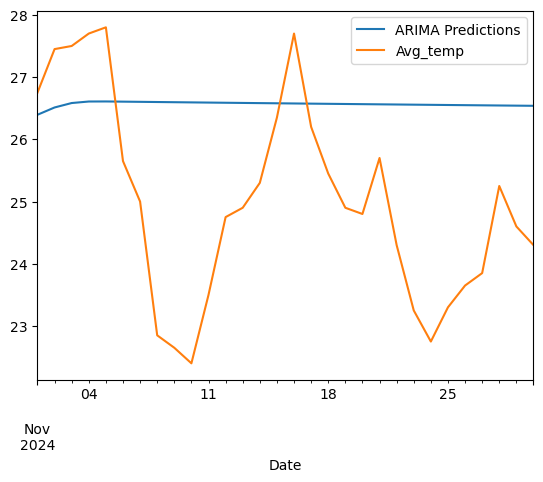

In [43]:
pred.plot(legend=True)
test['Avg_temp'].plot(legend=True)

In [44]:
test['Avg_temp'].mean()

25.018333333333327

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [46]:
rmse=sqrt(mean_squared_error(pred,test['Avg_temp']))
rmse

2.229635479993404

In [47]:
model2=sm.tsa.arima.ARIMA(ndata['Avg_temp'],order=(1,0,5))
model2=model2.fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [48]:
index_future_dates=pd.date_range(start="2024-12-01",end="2025-01-30")
print(index_future_dates)

DatetimeIndex(['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04',
               '2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08',
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16',
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24',
               '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-28',
               '2024-12-29', '2024-12-30', '2024-12-31', '2025-01-01',
               '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05',
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09',
               '2025-01-10', '2025-01-11', '2025-01-12', '2025-01-13',
               '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17',
               '2025-01-18', '2025-01-19', '2025-01-20', '2025-01-21',
               '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-25',
      

In [49]:
pred = model2.predict(start=len(ndata), end=len(ndata)+60, typ="levels").rename("ARIMA Prediction")
pred.index = index_future_dates
pred

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2024-12-01    24.234000
2024-12-02    24.263005
2024-12-03    24.323584
2024-12-04    24.357506
2024-12-05    24.372491
                ...    
2025-01-26    24.896266
2025-01-27    24.904525
2025-01-28    24.912725
2025-01-29    24.920866
2025-01-30    24.928947
Freq: D, Name: ARIMA Prediction, Length: 61, dtype: float64

<Axes: >

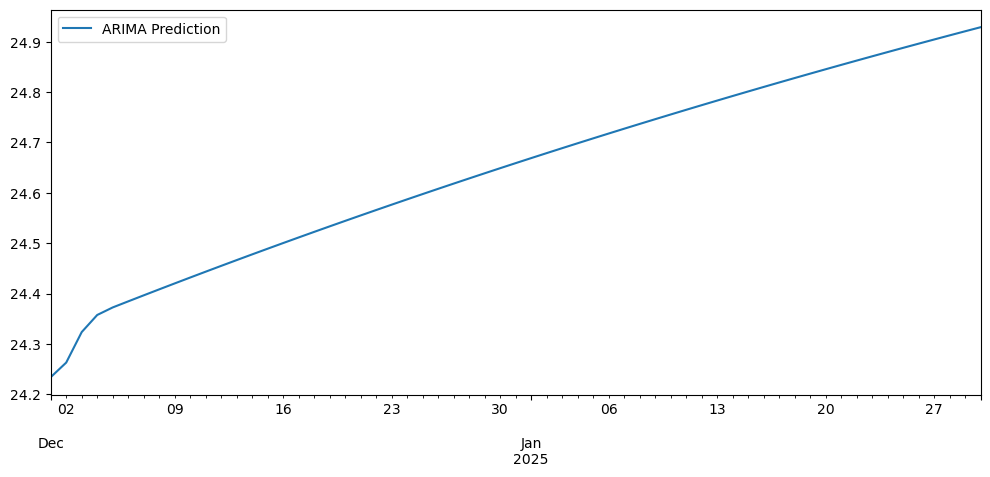

In [50]:
pred.plot(figsize=(12,5),legend=True)
#test['Avg_temp'].plot(legend=True)